# Breast Cancer Woimbra
# Classification 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [2]:
dataset = pd.read_csv('dataR2.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


## Splitting dataset into the training set and test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=0)

## Feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
print(X_train)

[[ 1.75262332e+00 -1.39234435e-01  1.79019333e+00  1.45789078e+00
   1.45467030e+00  3.10588401e+00  6.36685813e-01 -8.06550811e-01
  -1.34100778e+00]
 [-5.78956468e-01  3.79450633e-01 -1.23423267e+00 -9.21936043e-02
  -3.17017347e-01  1.16175428e+00  1.15757153e-01  4.20154463e-01
   3.26075534e-01]
 [ 4.92309921e-01 -2.62527517e-01 -3.89172464e-01 -3.44213577e-01
  -3.22828203e-01 -6.57014718e-01 -2.39177983e-01 -1.68498716e-02
  -7.57338617e-01]
 [-8.94034817e-01  2.05186409e-03  5.55960662e-02  1.71227512e-02
  -5.13519695e-02 -7.68481424e-01 -6.94344847e-01  5.89392318e-01
  -3.09269063e-01]
 [ 1.50056064e+00  6.66909005e-01  1.00072919e-01  1.21112122e+00
   6.83706541e-01  1.78568707e-01 -8.85055675e-03  3.58801305e-01
   1.60089668e+00]
 [-4.52925128e-01 -9.95233850e-01  2.33503478e-01 -8.53638563e-01
  -5.67612560e-01 -1.00110021e+00 -9.73422462e-02 -2.68220443e-01
  -4.65352746e-01]
 [ 4.92309921e-01  7.12644068e-01 -3.44695611e-01  2.21039152e-02
  -1.16598596e-01  8.9334452

In [6]:
print(X_test)

[[-1.52419152 -1.27932107 -0.87841785 -0.75549617 -0.57715897 -0.67390921
   0.48248553 -0.61452799 -0.48042298]
 [-0.76800348 -1.13156904 -0.52260302  3.75057247  1.80678323 -0.8940768
  -0.03408543 -0.70717713 -0.61902233]
 [-0.26387812 -0.73049215 -0.52260302 -0.72035877 -0.5359826  -0.9675958
  -0.9677327  -0.35865572  0.43201944]
 [ 1.18548229 -0.39480552 -0.56707988 -0.60592662 -0.47977709 -0.71534665
  -0.03512474 -0.25185143 -0.04370817]
 [ 1.12246662 -0.81410183  0.90065627 -0.35148338 -0.17286153 -1.18608592
   0.50427711 -0.75019921 -0.72087658]
 [ 1.75262332 -0.24172909  4.59223507  4.37941077  6.06154625  0.97744755
  -0.71300848  0.689292    3.89176814]
 [-0.38990946  0.58380186 -0.47812617  2.84480838  1.35694555  0.06017746
  -0.57246957  0.68001289  0.85373235]
 [-1.1460975   0.59084641  1.3454248   4.41750994  3.5995783   0.14827445
  -0.58905304  0.18009008  0.4424697 ]
 [-0.76800348  1.05875503 -0.2557419  -0.44841414 -0.36518413 -0.46821976
  -0.12660561 -0.4673354

## Select the model

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('SVM', SVC(kernel = 'linear', random_state = 0)))
models.append(('KSVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('RFC', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)))
models.append(('LDA', LDA()))


## Select best of the best model

In [8]:
from sklearn.model_selection import cross_val_score, KFold

for name, model in models:
#     kFold = KFold(n_splits=10)
    accuracies = cross_val_score(model, X = X_train, y = y_train, cv = 10, scoring='accuracy')
    print(name,"Accuracy: {:.2f} %".format(accuracies.mean()*100),
          "Standard Deviation: {:.2f} %".format(accuracies.std()*100))

LR Accuracy: 71.25 % Standard Deviation: 20.19 %
KNN Accuracy: 73.75 % Standard Deviation: 13.05 %
SVM Accuracy: 68.75 % Standard Deviation: 17.90 %
KSVM Accuracy: 76.25 % Standard Deviation: 14.20 %
NB Accuracy: 63.75 % Standard Deviation: 18.92 %
DTC Accuracy: 72.50 % Standard Deviation: 17.50 %
RFC Accuracy: 70.00 % Standard Deviation: 18.71 %
LDA Accuracy: 65.00 % Standard Deviation: 20.00 %


## Applying Dimensionality Reduction

In [9]:
# # PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# #LDA (not suitable for class=2)
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components=1)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

#Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [10]:
print(X_train)

[[-0.25193916  0.27448663]
 [-0.30500736 -0.00803541]
 [ 0.31770878 -0.35208648]
 [ 0.06915105 -0.15065938]
 [-0.36038077  0.00471052]
 [ 0.53987893 -0.04972073]
 [-0.3994167  -0.01729445]
 [-0.1319394  -0.36824753]
 [ 0.13803941  0.64512598]
 [ 0.44899021 -0.12472312]
 [ 0.51983851  0.43523021]
 [ 0.13286413 -0.25064721]
 [-0.36604047 -0.032346  ]
 [-0.19142342  0.11024515]
 [ 0.389006   -0.28751621]
 [-0.44975138 -0.26007577]
 [ 0.3112188  -0.39217467]
 [-0.09394118 -0.25628426]
 [ 0.25908816 -0.25051803]
 [ 0.42638903  0.55137381]
 [-0.34953082 -0.15871196]
 [ 0.18984493  0.49278246]
 [-0.02973197 -0.42779483]
 [ 0.12533209 -0.40379669]
 [ 0.53141031  0.12891224]
 [ 0.37281821  0.0840429 ]
 [-0.02712647 -0.22096265]
 [-0.19780706 -0.03606266]
 [ 0.47401561  0.00101436]
 [ 0.14884336 -0.34684206]
 [-0.4966057   0.04160428]
 [-0.02537199  0.54499279]
 [ 0.00555391 -0.48639353]
 [-0.23424017  0.01852202]
 [-0.32900526  0.18409566]
 [ 0.03302334 -0.06160386]
 [ 0.49476079 -0.21299567]
 

In [11]:
print(X_test)

[[ 0.45233753  0.334242  ]
 [-0.15305347  0.29633822]
 [ 0.35060558 -0.29522611]
 [ 0.31628645 -0.37799681]
 [ 0.33908196 -0.0668421 ]
 [-0.15252195  0.26237237]
 [-0.3373305   0.20810658]
 [-0.17972781  0.27320486]
 [-0.05511126 -0.12968318]
 [ 0.28534763 -0.08114624]
 [-0.4907725   0.12386247]
 [ 0.21324274  0.16401326]
 [-0.27838859  0.25747933]
 [-0.38516632  0.09175894]
 [ 0.02414223 -0.27718294]
 [-0.18487336  0.16978639]
 [-0.14979745 -0.01520231]
 [ 0.34264641  0.10213326]
 [ 0.38571231  0.0174646 ]
 [ 0.45609168  0.06571963]
 [ 0.0079647   0.517125  ]
 [-0.00102303  0.49554118]
 [-0.50635203 -0.0255386 ]
 [-0.17328335  0.18866466]
 [-0.15081945  0.25769575]
 [ 0.14922511 -0.04662464]
 [-0.04483752  0.09997312]
 [ 0.00372702 -0.41624066]
 [ 0.50253236 -0.13074035]
 [-0.33346412  0.26719161]
 [-0.40905217  0.16970125]
 [ 0.19977221 -0.38136918]
 [ 0.26975367 -0.1580689 ]
 [-0.16388647 -0.25516428]
 [-0.00382297 -0.02128711]
 [ 0.27472441  0.04816143]]


## Training the best model on training set

In [12]:
# # Kernel SVM
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

# # Logistic Regression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

# Decision Tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# # Random Forest
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

## Predicting new result

In [13]:
print(classifier.predict(kpca.transform([[70,23,80,5,1,10,10,9,500]])))

[2]


## Predicting the Test set results

In [14]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [1 2]
 [2 1]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 1]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]]


## Making the confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[11  6]
 [ 2 17]]
              precision    recall  f1-score   support

           1       0.85      0.65      0.73        17
           2       0.74      0.89      0.81        19

    accuracy                           0.78        36
   macro avg       0.79      0.77      0.77        36
weighted avg       0.79      0.78      0.77        36



## Visualizing training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


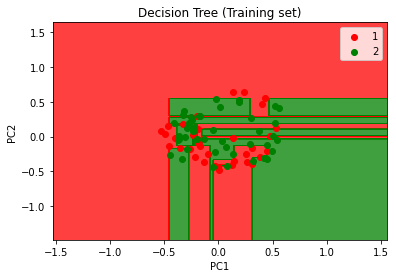

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualizing test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


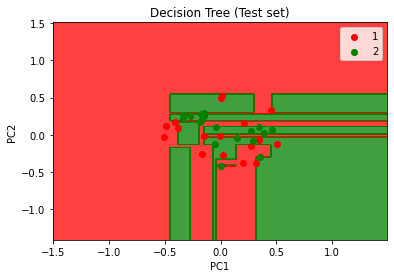

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()